In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("BikeSales.xlsx")
df.head()

,Price,BikeFeature1,BikeFeature2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


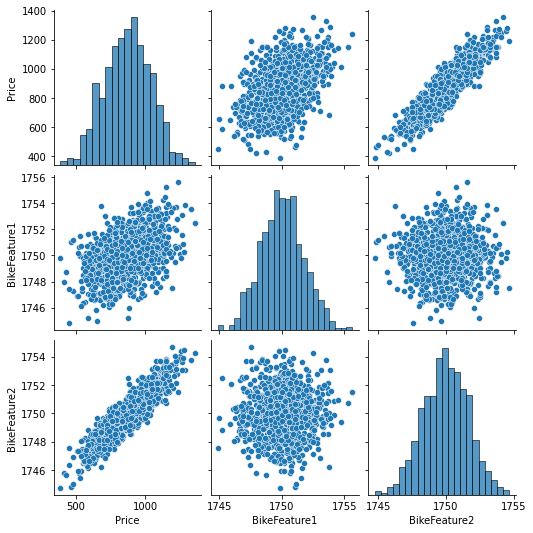

In [3]:
sns.pairplot(df);

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop("Price" , axis = 1).values
y = df["Price"].values  # df["Price"].values     .You can turn it to array with this way.
                        # If we dont add .values so it will be pandas series. But if you add .values it will be numpy array.

In [6]:
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size= 0.33 , random_state=15)

# We will do scaling on X data.

In [7]:
# We will do scaling on X data.

In [8]:
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler class will do the scale.

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(X_train) # We train scaler first. Then we will change X_train and X_test

MinMaxScaler()

In [11]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# We will create our model

In [12]:
import tensorflow as tf

In [13]:
from tensorflow.keras.models import Sequential   # We will create model with this.
from tensorflow.keras.layers import Dense        # We will add layers with this.

In [14]:
model = Sequential()

model.add(Dense(5,activation = "relu")) # Hidden layer 1
model.add(Dense(5,activation = "relu")) # Hidden layer 2
model.add(Dense(5,activation = "relu")) # Hidden layer 3

model.add(Dense(1)) # Output perception

model.compile(optimizer = "rmsprop" , loss = "mse") # We compiled our model with good parameters.

In [15]:
model.fit(X_train,y_train,epochs=500)

Epoch 1/500
21/21 [==============================] - 0s 913us/step - loss: 796043.0000
Epoch 2/500
21/21 [==============================] - 0s 937us/step - loss: 795828.1250
Epoch 3/500
21/21 [==============================] - 0s 913us/step - loss: 795654.3125
Epoch 4/500
21/21 [==============================] - 0s 885us/step - loss: 795491.1250
Epoch 5/500
21/21 [==============================] - 0s 899us/step - loss: 795312.8750
Epoch 6/500
21/21 [==============================] - 0s 987us/step - loss: 795101.0000
Epoch 7/500
21/21 [==============================] - 0s 918us/step - loss: 794849.3750
Epoch 8/500
21/21 [==============================] - 0s 973us/step - loss: 794539.0625
Epoch 9/500
21/21 [==============================] - 0s 933us/step - loss: 794169.5625
Epoch 10/500
21/21 [==============================] - 0s 1ms/step - loss: 793737.3750
Epoch 11/500
21/21 [==============================] - 0s 1ms/step - loss: 793232.6250
Epoch 12/500
21/21 [=========================

# We will look our loss function

In [16]:
loss = model.history.history # our loss function rates.
loss = loss["loss"]

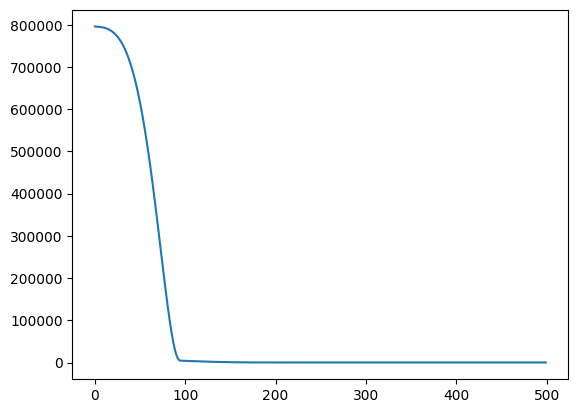

In [17]:
sns.lineplot(x=range(len(loss)) , y = loss);

In [18]:
trainLoss = model.evaluate(X_train,y_train , verbose=0)
trainLoss

73.22286987304688

In [19]:
testLoss = model.evaluate(X_test,y_test , verbose = 0)
testLoss

75.3621826171875

# We will predict test values now.

In [20]:
model_predicts = model.predict(X_test)

11/11 [==============================] - 0s 898us/step


In [21]:
model_predicts = pd.Series(model_predicts.reshape(-1,))
model_predicts

0      1078.305664
1       623.966492
2       876.462524
3       894.516541
4       899.769287
          ...     
325    1014.028015
326     791.035095
327     766.234192
328    1168.197754
329     802.960388
Length: 330, dtype: float32

In [22]:
predictDF = pd.DataFrame(y_test, columns=["Real values"])
predictDF

,Real values
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [23]:
predictDF = pd.concat([predictDF,model_predicts] , axis = 1)
predictDF

,Real values,0
0,1081.652164,1078.305664
1,622.675990,623.966492
2,889.356810,876.462524
3,902.826733,894.516541
4,897.662404,899.769287
...,...,...
325,1028.438035,1014.028015
326,789.934950,791.035095
327,758.490486,766.234192
328,1172.871659,1168.197754


In [24]:
predictDF.columns = ["Real Values" , "Model Predicts"]
predictDF

,Real Values,Model Predicts
0,1081.652164,1078.305664
1,622.675990,623.966492
2,889.356810,876.462524
3,902.826733,894.516541
4,897.662404,899.769287
...,...,...
325,1028.438035,1014.028015
326,789.934950,791.035095
327,758.490486,766.234192
328,1172.871659,1168.197754


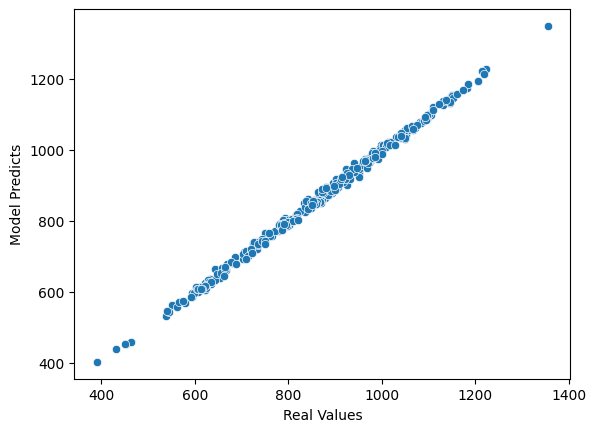

In [25]:
sns.scatterplot(x = predictDF["Real Values"] , y = predictDF["Model Predicts"]);

# Lets look metrics

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
mean_absolute_error(predictDF["Real Values"],predictDF["Model Predicts"])

6.951643635055632

In [28]:
mean_squared_error(predictDF["Real Values"],predictDF["Model Predicts"]) # This is not meaningful

75.36219476508559

In [29]:
df.describe() # Price mean is 872. Our mae is 7.1 . So that's not bad. Our model is cool !.

,Price,BikeFeature1,BikeFeature2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


# We will predict something new now.

In [30]:
newBikeFeatures = [[1750,1749.9]]

In [31]:
newBikeFeatures = scaler.transform(newBikeFeatures)

In [32]:
model.predict(newBikeFeatures)

1/1 [==============================] - 0s 14ms/step


array([[865.7487]], dtype=float32)

# We will load model for next time

In [33]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("BikeModels.h5")

In [ ]:
afterLoadedModel = load_model("BikeModels.h5")

In [ ]:
afterLoadedModel.predict(newBikeFeatures)

In [ ]:
# Done !